In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Diplomatic1/Implementation")
!ls

dataset_Final.csv	    dataset_Final_FS_COR_3.csv	final_model.sav
dataset_Final_FE.csv	    dataset_Final_FS_COR_4.csv	KDDTest.txt
dataset_Final_FS_COR_1.csv  dataset_Final_FS_DT_1.csv	KDDTrain.txt
dataset_Final_FS_COR_2.csv  Diplomatic1.ipynb


In [ ]:
#SCRIPT1 DATASET CREATION 
import pandas as pd
import math



#FUNCTION USED FOR SAMPLING THE DATAFRAME TO CREATE A BALANCED DATASET OF SUBCLASSES // SPECIAL MINORITY SUBCLASSES AND MAJORITY SUBCLASSES
def sample(list_of_names,df,num):
  result = pd.DataFrame()
  for item in list_of_names:
#IF STATEMENT TO RETRIEVE ALL SAMPLES OF MINORITY SUBCLASSSES
    if item == 'worm' or item == 'udpstorm' or item == 'httptunnel' or item == 'land' or item == 'spy' or item == 'xsnoop' or item == 'phf' or item == 'xlock' or item == 'ftp_write' or item == 'imap' or item == 'sendmail' or item == 'named' or item == 'multihop':
     df_temp = df.loc[(df['class'] == item)]
     result = result.append(df_temp, ignore_index = True)
#ELSE SAMPLE SPECIFIED NUMBER OF SAMPLES FOR A TOTAL SUM OF num PER CLASS
    else:
     df_temp = df.loc[(df['class'] == item)]
     temp = df_temp.sample(num)
     result = result.append(temp, ignore_index = True)
  return result 

#INITIAL CSVs THAT I WILL CONCATENATE
#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/KDDTrain.txt'
#url2 = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/KDDTest.txt'

url = 'KDDTrain.txt'
url2 = 'KDDTest.txt'

#FEATURES NAMES FOR CSV COLUMNS
headerList = ['duration', 'protocol_type', 'service', 'flag','src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
              'num_failed_logins', 'logged_in','num_compromised', 'root_shell', 'su_attempted', 'num_root','num_file_creations',
              'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
              'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
              'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
              'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty']

#CREATE DATAFRAMES OF CSVs
df = pd.read_csv(url,names=headerList)
df2 = pd.read_csv(url2,names=headerList)

#df['class'].value_counts()
#df3 = df2.loc[(df2['class'] == 'buffer_overflow') | (df2['class'] == 'loadmodule') | (df2['class'] == 'rootkit') | (df2['class'] == 'perl') | (df2['class'] == 'sqlattack') | (df2['class'] == 'xterm') | (df2['class'] == 'ps')]

#CONCAT THE TWO DATAFRAMES
df = df.append(df2, ignore_index = True)
#print(df['class'].value_counts())
#WS EDW OLA KALA
#print(df['class'].unique())

#DROP DIFFICULTY COLUMN HAS TO BE DONE IRRELEVANT INFORMATION ABOUT ENTRY
df.drop('difficulty', inplace=True, axis=1)

#ANNOTATE SUBCLASSES
#U2R
df.loc[(df['class'] == 'buffer_overflow') | (df['class'] == 'loadmodule') | (df['class'] == 'rootkit') | (df['class'] == 'perl') | (df['class'] == 'sqlattack') | (df['class'] == 'xterm') | (df['class'] == 'ps'), 'CATEGORY'] = 'U2R'

#NORMAL
df.loc[(df['class'] == 'normal'), 'CATEGORY'] = 'NORMAL'

#DDOS
df.loc[ (df['class'] == 'mailbomb') |(df['class'] == 'back') | (df['class'] == 'land') | (df['class'] == 'neptune') | (df['class'] == 'pod') | (df['class'] == 'smurf') | (df['class'] == 'teardrop') | (df['class'] == 'apache2') | (df['class'] == 'udpstorm') | (df['class'] == 'processtable') | (df['class'] == 'worm'), 'CATEGORY'] = 'DDOS'

#PROBE
df.loc[(df['class'] == 'satan') | (df['class'] == 'ipsweep') | (df['class'] == 'nmap') | (df['class'] == 'portsweep') | (df['class'] == 'mscan') | (df['class'] == 'saint'), 'CATEGORY'] = 'PROBE'

#R2L
df.loc[(df['class'] == 'guess_passwd') | (df['class'] == 'ftp_write') | (df['class'] == 'imap') | (df['class'] == 'phf') | (df['class'] == 'multihop') | (df['class'] == 'warezmaster') | (df['class'] == 'warezclient') | (df['class'] == 'spy') | (df['class'] == 'xlock') | (df['class'] == 'xsnoop') | (df['class'] == 'snmpguess') | (df['class'] == 'snmpgetattack') | (df['class'] == 'httptunnel') | (df['class'] == 'sendmail') | (df['class'] == 'named'), 'CATEGORY'] = 'R2L'

#df_temp = df.loc[(df['CATEGORY'] == 'R2L')]
#print(df_temp['class'].value_counts())


#SAMPLING
#FOR PROBE CATEGORY
temp = df.loc[(df['CATEGORY'] == 'PROBE')]
names_probe = temp['class'].unique().tolist()
df_total_probe = sample(names_probe,df,170)

#FOR DDOS CATEGORY
temp = df.loc[(df['CATEGORY'] == 'DDOS')]
names_ddos = temp['class'].unique().tolist()
df_total_ddos = sample(names_ddos,df,130)

#FOR R2L CATEGORY
temp = df.loc[(df['CATEGORY'] == 'R2L')]
names_r2l = temp['class'].unique().tolist()
df_total_r2l = sample(names_r2l,df,170)

#FOR NORMAL CLASS 
df_total_normal = df.loc[(df['CATEGORY'] == 'NORMAL')].sample(1000)

#FOR U2R MINORITY CLASS ALL SAMPLES INCLUDED AND CONCATENATE WITH REST
df_total_u2r = df.loc[(df['CATEGORY'] == 'U2R')]

df_total = pd.DataFrame()
df_total = df_total.append(df_total_probe, ignore_index = True)
df_total = df_total.append(df_total_ddos, ignore_index = True)
df_total = df_total.append(df_total_r2l, ignore_index = True)
df_total = df_total.append(df_total_normal, ignore_index = True)
df_total = df_total.append(df_total_u2r, ignore_index = True)


df_total.to_csv('dataset_Final.csv', index=False)


In [ ]:
#SCRIPT2 FEATURE ENGINIRING
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher



#FUNCTION TO NORMALIZE
def normalize(collumns,df_test):
  for i in collumns:
    df_test.iloc[:,i]= (df_test.iloc[:,i] - df_test.iloc[:,i].min()) / (df_test.iloc[:,i].max() - df_test.iloc[:,i].min())    



#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final.csv'
url = 'dataset_Final.csv'
df = pd.read_csv(url)

#ALL ZEROOES NO INFO SO DROP
#print(df['num_outbound_cmds'])
#COLUMNS TO NORMALIZE
to_normalize = [4,5,7,8,9,10,12,15,16,17,18,19,22,23,31,32]

#NORMALIZATION ON COLUMNS
normalize(to_normalize,df)

#HASH TRICK 5 NEW FEATURES
h = FeatureHasher(n_features=5, input_type='string')
f = h.transform(df.service)

df_hash = pd.DataFrame(f.toarray(),columns=['HASH1', 'HASH2','HASH3','HASH4','HASH5'])

df = df.join(df_hash)

#ONE HOT FOR PROTOCOLTYPE
one_hot = pd.get_dummies(df['protocol_type'])
df = df.join(one_hot)

#BUIISSNES LOGIC ON FLAG
df.loc[df["flag"] != "SF",'flag'] = 0
df.loc[df["flag"] == "SF", 'flag'] = 1


#DROP COLUMNS NOT NEEDED protocol_type , service
del df['service']
del df['protocol_type']

#SAVE NEW CSV
df.to_csv('dataset_Final_FE.csv', index=False)

In [ ]:
#SCRIPT3 TEST DT/SVC WITH SMOTE/CLASS WEIGHTS/NOTHING
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn import metrics
from sklearn import svm
from imblearn.over_sampling import SMOTE 



#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final_FE.csv'
url = 'dataset_Final_FE.csv'

df = pd.read_csv(url)
#KEEP LABELS 
Y = df.CATEGORY
del df['CATEGORY']
del df['class']
del df['num_outbound_cmds']
X = df
print("Starting")

acc_base_avg = 0
recall_base_avg = [0,0,0,0,0]
precission_base_avg = [0,0,0,0,0]

acc_weigths_avg = 0
recall_weights_avg = [0,0,0,0,0]
precission_weights_avg = [0,0,0,0,0]

acc_smote_avg = 0
recall_smote_avg = [0,0,0,0,0]
precission_smote_avg = [0,0,0,0,0]

#TEST THREE SCENARIOS
for j in range(1000):
 for i in range(3):
  if i == 0:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    clf_dt = DecisionTreeClassifier()

    clf_dt.fit(X_train,y_train)

    y_pred_dt=clf_dt.predict(X_test)


    accuracy = metrics.accuracy_score(y_test, y_pred_dt)
    recall = metrics.recall_score(y_test, y_pred_dt,average=None)
    precission = metrics.precision_score(y_test, y_pred_dt,average=None)

    acc_base_avg = acc_base_avg + accuracy
    recall_base_avg = recall_base_avg + recall
    precission_base_avg = precission_base_avg + precission


  elif i == 1:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    clf_dt = DecisionTreeClassifier(class_weight='balanced')

    clf_dt.fit(X_train,y_train)

    y_pred_dt=clf_dt.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred_dt)
    recall = metrics.recall_score(y_test, y_pred_dt,average=None)
    precission = metrics.precision_score(y_test, y_pred_dt,average=None)

    acc_weigths_avg = acc_weigths_avg + accuracy
    recall_weights_avg = recall_weights_avg + recall
    precission_weights_avg = precission_weights_avg + precission


  else:
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    smi = SMOTE(random_state=42)
    X_smote, y_smote = smi.fit_resample(X_train, y_train)

    clf_dt = DecisionTreeClassifier()

    clf_dt.fit(X_smote,y_smote)

    y_pred_dt=clf_dt.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred_dt)
    recall = metrics.recall_score(y_test, y_pred_dt,average=None)
    precission = metrics.precision_score(y_test, y_pred_dt,average=None)

    acc_smote_avg = acc_smote_avg + accuracy
    recall_smote_avg = recall_smote_avg + recall
    precission_smote_avg = precission_smote_avg + precission

print("Accuracy baseline for DT:",acc_base_avg/1000)
print("Precision baseline for DT:",precission_base_avg/1000)
print("Recall baseline for DT:",recall_base_avg/1000)

print("Accuracy with SMOTE for DT:",acc_smote_avg/1000)
print("Precision with SMOTE for DT:",precission_smote_avg/1000)
print("Recall with SMOTE for DT:",recall_smote_avg/1000)

print("Accuracy with class weights for DT:",acc_weigths_avg/1000)
print("Precision with class weights for DT:",precission_weights_avg/1000)
print("Recall with class weights for DT:",recall_weights_avg/1000)  

Starting
Accuracy baseline for DT: 0.9456156832298156
Precision baseline for DT: [0.97986017 0.92848064 0.97007854 0.92952817 0.72951489]
Recall baseline for DT: [0.97977673 0.92945173 0.96638168 0.92929365 0.745999  ]
Accuracy with SMOTE for DT: 0.9455093167701885
Precision with SMOTE for DT: [0.97778205 0.9302155  0.96756439 0.9329871  0.73178427]
Recall with SMOTE for DT: [0.97893345 0.92577156 0.96504083 0.92926081 0.7923157 ]
Accuracy with class weights for DT: 0.942828416149071
Precision with class weights for DT: [0.97573332 0.92745908 0.96434262 0.92697062 0.74046506]
Recall with class weights for DT: [0.97798494 0.92437003 0.96439113 0.92769195 0.73503992]


(4291, 49)
(4291,)
Index(['dst_host_serror_rate', 'dst_host_diff_srv_rate', 'diff_srv_rate',
       'land', 'dst_host_srv_serror_rate', 'dst_host_count', 'udp',
       'num_compromised', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'HASH3', 'srv_count', 'dst_host_same_src_port_rate', 'count',
       'wrong_fragment', 'dst_host_rerror_rate', 'srv_diff_host_rate',
       'src_bytes', 'dst_bytes', 'HASH5'],
      dtype='object')


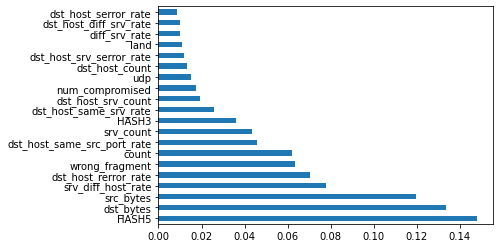

(4291, 21)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#SCRIPT4 FEATURE SELECTION DECISSION TREE IMPORTANCE 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import matplotlib.pyplot as plt

url = 'dataset_Final_FE.csv'
#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final_SMOTE.csv'

df = pd.read_csv(url)
print(df.shape)
Y = df['CATEGORY']
print(Y.shape)
del df['CATEGORY']
del df['class']
del df['num_outbound_cmds']

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3)
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)

importance = clf_dt.feature_importances_
index = np.argsort(importance)[-20:]
#print(np.sum(importance[index]))
colname = df.columns[index]
print(colname)
feat_importances = pd.Series(clf_dt.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

df_new = df[colname]

df_new['CATEGORY'] = Y
print(df_new.shape)

#SAVE NEW CSV
df_new.to_csv('dataset_Final_FS_DT_2.csv', index=False)

In [ ]:
#SCRIPT5 CORRELATION MATRIX FEATURE SELECTION
import pandas as pd
import numpy as np

url = 'dataset_Final_FE.csv'
#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final_SMOTE.csv'
df = pd.read_csv(url)
print(df.shape)
Y = df['CATEGORY']
print(Y.shape)
del df['CATEGORY']
del df['class']
del df['num_outbound_cmds']

cor = df.corr().abs()
print(cor.shape)
sum = cor.sum(axis=1)
#print(sum)
index = np.argsort(sum)
print(sum[index])
index_rest = index[0:15]
print(df.columns[index_rest])
#print(sum[index_rest])
colname = df.columns[index_rest]

df_new2 = df[colname]
df_new2['CATEGORY'] = Y
print(df_new2.columns)

#SAVE NEW CSV
df_new2.to_csv('dataset_Final_FS_COR_3.csv', index=False)

(4291, 49)
(4291,)
(46, 46)
src_bytes                       1.540186
dst_bytes                       1.668540
is_host_login                   1.946543
su_attempted                    2.102771
num_failed_logins               2.700340
urgent                          3.199463
land                            3.641673
num_file_creations              3.737264
num_shells                      3.794490
duration                        3.809925
num_access_files                3.985942
hot                             4.073520
is_guest_login                  4.132527
num_root                        4.392071
wrong_fragment                  4.500331
num_compromised                 4.606069
root_shell                      5.139466
HASH2                           5.219184
srv_count                       5.533944
srv_diff_host_rate              5.740913
HASH1                           6.398080
dst_host_srv_diff_host_rate     6.412166
dst_host_serror_rate            6.616507
serror_rate                  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#SCRIPT REEEEECOR CORRELATION MATRIX FEATURE SELECTION
import pandas as pd
import numpy as np

url = 'dataset_Final_FS_COR_1.csv'
#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final_SMOTE.csv'
df = pd.read_csv(url)
print(df.shape)
Y = df['CATEGORY']
print(Y.shape)
del df['CATEGORY']
#del df['class']
#del df['num_outbound_cmds']

cor = df.corr().abs()
print(cor.shape)
sum = cor.sum(axis=1)
#print(sum)
index = np.argsort(sum)
print(sum[index])
index_rest = index[0:9]
print(df.columns[index_rest])
#print(sum[index_rest])
colname = df.columns[index_rest]

df_new2 = df[colname]
df_new2['CATEGORY'] = Y
print(df_new2.columns)

#SAVE NEW CSV
df_new2.to_csv('dataset_Final_FS_COR_4.csv', index=False)

(4291, 21)
(4291,)
(20, 20)
dst_bytes             1.117029
src_bytes             1.231220
land                  1.296515
is_host_login         1.301476
duration              1.483810
num_failed_logins     1.493823
srv_count             1.537385
wrong_fragment        1.637929
su_attempted          1.641351
srv_diff_host_rate    1.793943
is_guest_login        1.952195
HASH2                 2.205370
hot                   2.246858
urgent                2.544641
num_file_creations    2.786228
num_shells            2.917774
num_access_files      3.002993
root_shell            3.669016
num_root              3.807150
num_compromised       3.890030
dtype: float64
Index(['dst_bytes', 'src_bytes', 'land', 'is_host_login', 'duration',
       'num_failed_logins', 'srv_count', 'wrong_fragment', 'su_attempted'],
      dtype='object')
Index(['dst_bytes', 'src_bytes', 'land', 'is_host_login', 'duration',
       'num_failed_logins', 'srv_count', 'wrong_fragment', 'su_attempted',
       'CATEGORY'],
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#SCRIPT6 DATASET EVALUATION WITH MEAN VALUES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn import svm

#url = 'dataset_Final_FS_DT_1.csv'
url = 'dataset_Final_FS_COR_3.csv'
#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final_FS_DT_1.csv'
#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final_FS_COR_2.csv'

df = pd.read_csv(url)

Y = df.CATEGORY
del df['CATEGORY']
X = df
iterations = 100
accuracy_avg = 0
recall_avg = [0,0,0,0,0]
precission_avg = [0,0,0,0,0]

for i in range(1000):

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
  clf_dt = DecisionTreeClassifier(class_weight='balanced')

  clf_dt.fit(X_train,y_train)

  labels = clf_dt.classes_
  #print(labels)
  #print('======')

  y_pred_dt=clf_dt.predict(X_test)

  accuracy = metrics.accuracy_score(y_test, y_pred_dt)
  recall = metrics.recall_score(y_test, y_pred_dt,average=None)
  precision = metrics.precision_score(y_test, y_pred_dt,average=None)

  recall_avg = recall_avg + recall
  precission_avg = precission_avg + precision
  accuracy_avg = accuracy_avg + accuracy
  

accuracy_avg = accuracy_avg/1000
recall_avg = recall_avg/1000
precission_avg = precission_avg/1000

print("Accuracy for DT:",accuracy_avg)
print("Precision for DT:",precission_avg)
print("Recall for DT:",recall_avg)


Accuracy for DT: 0.8331576086956527
Precision for DT: [0.93638604 0.93473117 0.71989397 0.79842025 0.71265167]
Recall for DT: [0.86895834 0.82330788 0.85622338 0.79388868 0.7544156 ]


In [ ]:
#SCRIPT7 K-FOLD CROSS VALIDATION 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifie
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import pickle

#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final_Final.csv'
url = 'dataset_Final_FS_COR_3.csv'
df = pd.read_csv(url)

Y = df.CATEGORY
del df['CATEGORY']
X = df

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

cv = KFold(n_splits=10, shuffle=True, random_state=1)
results = list()

best_recall = 0
best_params = dict()
for train_ix, test_ix in cv.split(X_train):
 X_train_cv, X_test_cv = X_train.iloc[train_ix], X_train.iloc[test_ix]
 y_train_cv, y_test_cv = Y_train.iloc[train_ix], Y_train.iloc[test_ix]
 
 clf_dt = DecisionTreeClassifier(class_weight='balanced')

 space = dict()
 space['max_depth'] = [16,17,18,19,20,21,22,23,24,25]
 space['criterion'] = ['gini','entropy']
 space['splitter'] = ['best','random']
 space['min_samples_split'] = [2,3,4,5]

 search = GridSearchCV(clf_dt, space, refit=True)
 result = search.fit(X_train_cv, y_train_cv)
 best_model = result.best_estimator_
 yhat = best_model.predict(X_test_cv)
 recall = metrics.recall_score(y_test_cv, yhat,average=None)
 
 avg_recall = np.sum(recall)/5
 if avg_recall > best_recall:
   best_params = best_model.get_params()
   model = best_model

 print(avg_recall)
print(best_params)
print(type(model))
y_pred = model.predict(X_test)

print("Accuracy Final model:",metrics.accuracy_score(Y_test, y_pred))
print("Confusion Matrix final model : \n", metrics.confusion_matrix(Y_test, y_pred),"\n")
print("Precision final model:",metrics.precision_score(Y_test, y_pred,average=None))
print("Recall final model:",metrics.recall_score(Y_test, y_pred,average=None))
print('PARAMS', model.get_params())
filename = 'final_model.sav'

pickle.dump(model, open( filename, "wb" ) )

0.804949115378782
0.8231704479564069
0.810651312216978
0.9092246412349855
0.8414975369458129
0.8680952208893385
0.8288569534332246
0.7825193325193325
0.7494307420255646
0.8771296099164954
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 19, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy Final model: 0.8695652173913043
Confusion Matrix final model : 
 [[291   0   8   0   0]
 [  7 259  23  21   1]
 [ 16   5 299   7   4]
 [  2  12  51 247   2]
 [  0   2   2   5  24]] 

Precision final model: [0.92088608 0.93165468 0.78067885 0.88214286 0.77419355]
Recall final model: [0.97324415 0.83279743 0.90332326 0.7866242  0.72727273]
PARAMS {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 19, 'max_features': None, 'max_leaf_n

In [ ]:
#SCRIPT7 K-FOLD CROSS VALIDATION with multiple repetitions NOTTTTTTTTTTTTTTTTTTTTTTTTTTT
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifie
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import pickle
import itertools as it

index_list = [0] * 160

my_dic={'max_depth':[16,17,18,19,20,21,22,23,24,25],'criterion':['gini','entropy'],'splitter':['best','random'],'min_samples_split':[2,3,4,5]}
allNames = sorted(my_dic)
combinations = it.product(*(my_dic[Name] for Name in allNames))
print(list(combinations))
new_list = [item for item in it.product(*(my_dic[Name] for Name in allNames))]
print(len(new_list))
print(new_list[0])

#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final_Final.csv'
url = 'dataset_Final_FS_COR_3.csv'
df = pd.read_csv(url)

Y = df.CATEGORY
del df['CATEGORY']
X = df

for i in range(1):

 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

 cv = KFold(n_splits=10, shuffle=True, random_state=1)
 results = list()

 best_recall = 0
 best_params = dict()
 for train_ix, test_ix in cv.split(X_train):
  X_train_cv, X_test_cv = X_train.iloc[train_ix], X_train.iloc[test_ix]
  y_train_cv, y_test_cv = Y_train.iloc[train_ix], Y_train.iloc[test_ix]
 
  clf_dt = DecisionTreeClassifier()

  space = dict()
  space['max_depth'] = [16,17,18,19,20,21,22,23,24,25]
  space['criterion'] = ['gini','entropy']
  space['splitter'] = ['best','random']
  space['min_samples_split'] = [2,3,4,5]

  search = GridSearchCV(clf_dt, space, refit=True)
  result = search.fit(X_train_cv, y_train_cv)
  best_model = result.best_estimator_
  yhat = best_model.predict(X_test_cv)
  recall = metrics.recall_score(y_test_cv, yhat,average=None)
  #print(best_model.get_params())
  #print(type(best_model.get_params()))
  criterion = best_model.get_params()['criterion']
  max_depth = best_model.get_params()['max_depth']
  splitter = best_model.get_params()['splitter']
  min_samples_split = best_model.get_params()['min_samples_split']
  l = []
  l.append(criterion)
  l.append(max_depth)
  l.append(min_samples_split)
  l.append(splitter)
 
  a = tuple(l)
  #index = new_list.index(a)
  #print(index)
  #print(new_list[index])
  #print(a)
  #fail
  #rec = recall[4]
  
  avg_recall = np.sum(recall)/5
  if avg_recall > best_recall:
   best_recall = avg_recall 
   best_params = best_model.get_params()
   index = new_list.index(a)
   index_list[index] = index_list[index] + 1
   model = best_model

 # print(avg_recall)
#print(best_params)
#print(type(model))
y_pred = model.predict(X_test)

print("Accuracy Final model:",metrics.accuracy_score(Y_test, y_pred))
print("Confusion Matrix final model : \n", metrics.confusion_matrix(Y_test, y_pred),"\n")
print("Precision final model:",metrics.precision_score(Y_test, y_pred,average=None))
print("Recall final model:",metrics.recall_score(Y_test, y_pred,average=None))

filename = 'final_model.sav'

pickle.dump(model, open( filename, "wb" ) )

[('gini', 16, 2, 'best'), ('gini', 16, 2, 'random'), ('gini', 16, 3, 'best'), ('gini', 16, 3, 'random'), ('gini', 16, 4, 'best'), ('gini', 16, 4, 'random'), ('gini', 16, 5, 'best'), ('gini', 16, 5, 'random'), ('gini', 17, 2, 'best'), ('gini', 17, 2, 'random'), ('gini', 17, 3, 'best'), ('gini', 17, 3, 'random'), ('gini', 17, 4, 'best'), ('gini', 17, 4, 'random'), ('gini', 17, 5, 'best'), ('gini', 17, 5, 'random'), ('gini', 18, 2, 'best'), ('gini', 18, 2, 'random'), ('gini', 18, 3, 'best'), ('gini', 18, 3, 'random'), ('gini', 18, 4, 'best'), ('gini', 18, 4, 'random'), ('gini', 18, 5, 'best'), ('gini', 18, 5, 'random'), ('gini', 19, 2, 'best'), ('gini', 19, 2, 'random'), ('gini', 19, 3, 'best'), ('gini', 19, 3, 'random'), ('gini', 19, 4, 'best'), ('gini', 19, 4, 'random'), ('gini', 19, 5, 'best'), ('gini', 19, 5, 'random'), ('gini', 20, 2, 'best'), ('gini', 20, 2, 'random'), ('gini', 20, 3, 'best'), ('gini', 20, 3, 'random'), ('gini', 20, 4, 'best'), ('gini', 20, 4, 'random'), ('gini', 20

In [ ]:
print(index_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
import itertools as it

my_dict={'max_depth':[16,17,18,19,20,21,22,23,24,25],'criterion':['gini','entropy'],'splitter':['best','random'],'min_samples_split':[2,3,4,5]}
allNames = sorted(my_dict)
combinations = it.product(*(my_dict[Name] for Name in allNames))
print(list(combinations))
new_list = [item for item in it.product(*(my_dict[Name] for Name in allNames))]
print(len(new_list))
print(type(new_list[0]))

a = new_list[5]
print(a)
index = new_list.index(a)
print(index)


[('gini', 16, 2, 'best'), ('gini', 16, 2, 'random'), ('gini', 16, 3, 'best'), ('gini', 16, 3, 'random'), ('gini', 16, 4, 'best'), ('gini', 16, 4, 'random'), ('gini', 16, 5, 'best'), ('gini', 16, 5, 'random'), ('gini', 17, 2, 'best'), ('gini', 17, 2, 'random'), ('gini', 17, 3, 'best'), ('gini', 17, 3, 'random'), ('gini', 17, 4, 'best'), ('gini', 17, 4, 'random'), ('gini', 17, 5, 'best'), ('gini', 17, 5, 'random'), ('gini', 18, 2, 'best'), ('gini', 18, 2, 'random'), ('gini', 18, 3, 'best'), ('gini', 18, 3, 'random'), ('gini', 18, 4, 'best'), ('gini', 18, 4, 'random'), ('gini', 18, 5, 'best'), ('gini', 18, 5, 'random'), ('gini', 19, 2, 'best'), ('gini', 19, 2, 'random'), ('gini', 19, 3, 'best'), ('gini', 19, 3, 'random'), ('gini', 19, 4, 'best'), ('gini', 19, 4, 'random'), ('gini', 19, 5, 'best'), ('gini', 19, 5, 'random'), ('gini', 20, 2, 'best'), ('gini', 20, 2, 'random'), ('gini', 20, 3, 'best'), ('gini', 20, 3, 'random'), ('gini', 20, 4, 'best'), ('gini', 20, 4, 'random'), ('gini', 20

In [ ]:
#SCRIPT10 MODEL TESTING SPEED EVALUATION
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifie
import pickle
import time

#url = 'https://raw.githubusercontent.com/jasonalexander87/machineL/main/dataset_Final_Final.csv'
url = 'dataset_Final_FS_COR_3.csv'
df = pd.read_csv(url)

Y = df.CATEGORY
del df['CATEGORY']
X = df

filename = 'final_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

start = time.time()

y_pred = loaded_model.predict(X)

end = time.time() - start
print(end,'seconds')
print(' for ',df.shape[0],'samples')

0.0026619434356689453 seconds
 for  4291 samples
